In [ ]:
from functions import *
import torchvision.models as models
import matplotlib.pyplot as plt


In [36]:
transformations = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#transformations = transforms.Compose([transforms.Resize(224),transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])

Files already downloaded and verified
The model will be running on cpu device
25.272510051727295  seconds in average for  10000.0  samples of testing data, for batch_size =  16
Files already downloaded and verified
The model will be running on cpu device
19.831422090530396  seconds in average for  10000.0  samples of testing data, for batch_size =  32
Files already downloaded and verified
The model will be running on cpu device
15.68657898902893  seconds in average for  10000.0  samples of testing data, for batch_size =  64
Files already downloaded and verified
The model will be running on cpu device
14.344892263412476  seconds in average for  10000.0  samples of testing data, for batch_size =  128
Files already downloaded and verified
The model will be running on cpu device
13.240203142166138  seconds in average for  10000.0  samples of testing data, for batch_size =  256
Files already downloaded and verified
The model will be running on cpu device
13.7219717502594  seconds in average

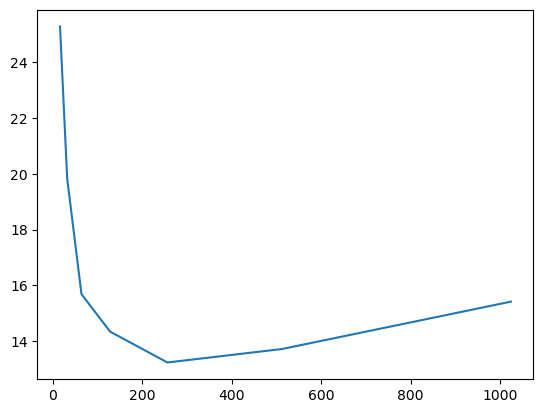

In [38]:
batch_size = [16,32,64,128,256,512,1024]
inference_time = []
for i in batch_size : 
    test_set = CIFAR10(root="./data", train=False, transform=transformations, download=True)
    test_loader = DataLoader(test_set, batch_size=i, shuffle=False, num_workers=0)

    #model = models.resnet18(weights="ResNet18_Weights.DEFAULT")
    #model = models.alexnet(weights="AlexNet_Weights.DEFAULT")
    #model = models.squeezenet1_0(weights="SqueezeNet1_0_Weights.DEFAULT")
    model = models.googlenet(weights="GoogLeNet_Weights.DEFAULT")
    #model = models.vgg16(weights="VGG16_Weights.DEFAULT")
    #model = models.vgg19(weights="VGG19_Weights.DEFAULT")
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print("The model will be running on", device, "device")

    start_time = time.time()
    total = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
    end_time = time.time()
    inference_time.append(end_time-start_time)
    print(end_time-start_time, " seconds in average for ", total, " samples of testing data, for batch_size = ", i)    
    
print(inference_time)
plt.plot(batch_size,inference_time)